<a href="https://colab.research.google.com/github/moonjune/test-repo/blob/master/%EB%A1%9C%EC%A7%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install tensorflow==1.12

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()
tf.set_random_seed(777)  # for reproducibility
tf.__version__

'1.12.0'

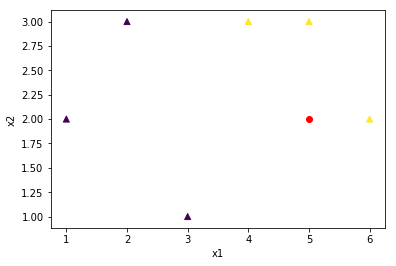

In [16]:
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]] # 2개 변수를 가진 2차원 행렬
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]] # 결과값 1차원

x_test = [[5.,2.]] # 얘는 테스트 용, 하지만 트레이닝 데이터와 차원을 맞출 필요가 있으므로 [[]] 사용
y_test = [[1.]] 

x1 = [x[0] for x in x_train] # 가장 가의 []는 리스트 선언, 뒤의 for x in ~는 앞의 x를 정의해줌, 그리고 [0]이란건 첫번째 변인 의미
x2 = [x[1] for x in x_train] #위에 있잖아

colors = [int(y[0] %3) for y in y_train] #color 리스트에 왜 숫자?에 쫄 필요 없음. color는 변수명, 나랑 스타일이 다른거
plt.scatter(x1, x2, c=colors, marker = '^') 
# 여기서 c가 컬러인데 색 배정을 구분할 변수를 넣으라는 것이고 거기에 color 리스트가 들어간 것. color 수치에 따라 색 바꾸란 거임
# 나 같으면 y 넣었을 것, 근데 현장 사람들의 스타일 상으론 y라 쓰지 않고 color로 전환하나..
# 앞의 x1, x2 는 x축 y축
plt.scatter(x_test[0][0], x_test[0][1],c = 'red')
#특별한 의미는 없음. 테스트 셋만 굳이 구별해주려 그런거,

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))#.repeat()
#tf.data는 새로 추가된 함수라고 한다.tf.data.Dataset.from_tensor_slices()는 신규 데이터를 넣을 때 사용되며,
#()안에는 리스트가 들어가면 된다.

In [0]:
W = tf.Variable(tf.zeros([2,1]), name = 'weight')
b = tf.Variable(tf.zeros([1]), name = 'biaas')

In [0]:
#분류를 해줄 sigmoid 함수의 정의
def logistic_regression(features):
  hypothesis = tf.div(1., 1.+tf.exp(tf.matmul(features, W) + b))
  return hypothesis

In [0]:
# 손실함수

def loss_fn(hypothesis, features, labels):
  cost = -tf.reduce_mean(labels * tf.log(logistic_regression(features)) + (1 - labels) * tf.log(1- hypothesis))
  return cost

# 가설함수, x값, y값을 받는 함수이다. 
# reduce_mean은 모든 차원을 더해서 평균 내는 것
# y * log(activation(y)) + (1-y)*log(activation(1-y)) 를 구현한 것 
# 앞의 마이너스는 형식 맞추는 용도니 신경 ㄴㄴ함

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

# 경사하강법 속성 가진 객체 선언
# 학습률은 0.01

In [0]:
def accuracy_fn(hypothesis, labels):
  predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype = tf.int32))
  return accuracy

# 정확도 함수 정의
# sigmoid는 변수들을 인식해서 0과 1사이의 어떤 값을 도출한다
# 그럼 그 값들 중 어떤 것을 1이라 볼지 정해줘야 하는데(예측이라 진값 모름) 그건 사람이 한다. 그래서 predicted가 있고 0.5라는 기준을 준거
# 정확도는 그 정확도 맞음
# tf.cast는 tf하고 비슷하다고 해야하려나.. 조건절 같은거. (조건, 출력형태)라 보면 됨. 다만 0과 1로만 나옴
# 먼저 predicted 변수는 가설이 0.5를 넘으면 1, 아니면 0을 값으로 가진다. 리스트의 형태가 되나...? hypothesis가 리스트니 당연
# accuracy는 predicted와 labels(진값 y)가 같은지 테스트 한다(같으면 1, 다르면 0). 굳이 캐스트가 또 들어갈 필요가 있나..
# 결과 값을 int32로 조정해주기 위해서 사용되는 건가 다음에 빼고 해보지

In [0]:
def grad(hypothesis, features, labels):
  with tf.GradientTape() as Tape:
    loss_value = loss_fn(logistic_regression(features), features, labels)
  return Tape.gradient(loss_value, [W,b])

# 미분해주기 위한 함수 정의
# loss_fn은 위에서 정의된 예측값과 인자와 진값을 받는 함수
# 근데 여기선 logistic_regression(features)을 가설로 받음.. 왜?
# loss_fn은 cost를 계산하는 함수로, y*log(a(y)) +(1-y)*log(1-a(y))인데...
# hypothesis가 logistic_regression(features)로 들어감으로써 식이 맞아지는건 맞음.. 이렇게 분리한 이유는?
# 
  

In [36]:
EPOCHS = 1001

for step in range(EPOCHS):
  for features, labels in tfe.Iterator(dataset): # tfe.Iterator(data)의 형태가 궁금하지만 그냥 zip 타입 리스트여도 상관없을 듯
    grads = grad(logistic_regression(features), features, labels) # 단계별 기울기를 구하고
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b])) # 옵티마이저에다가는 미분될 대상과 미분하는 인자 W, b를 선언
    if step % 100 == 0:
      print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
      
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

# 사용되는 함수는 좀 변하는 경향이 있으니 일단 넘어가고 추후 익숙해질것

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000
